## Input data

In [16]:
%matplotlib inline
from sklearn.cross_validation import KFold
from sklearn import tree
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_predict, cross_val_score

import sklearn_pandas as skpd

from sklearn import cross_validation
import pandas as pd
import matplotlib.pyplot as plt
from time import time


print('reading the data')
X_train = pd.read_csv('../data/UCI_HAR_Dataset/train/X_train.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('../data/UCI_HAR_Dataset/train/y_train.txt', header=None, delim_whitespace=True)
X_test = pd.read_csv('../data/UCI_HAR_Dataset/test/X_test.txt', header=None, delim_whitespace=True)
y_test = pd.read_csv('../data/UCI_HAR_Dataset/test/y_test.txt', header=None, delim_whitespace=True) 

print('finished reading data')

reading the data
finished reading data


# Run initial random forest

In [2]:
clf = tree.DecisionTreeClassifier()

start = time()
clf = clf.fit(X_train, y_train)

print('Random forest took %.2f seconds' % ((time() - start)))
y_predict = clf.predict(X_test)


print(classification_report(y_test, y_predict))

Random forest took 5.87 seconds
             precision    recall  f1-score   support

          1       0.82      0.87      0.85       496
          2       0.79      0.76      0.77       471
          3       0.84      0.83      0.84       420
          4       0.84      0.77      0.80       491
          5       0.80      0.86      0.83       532
          6       1.00      1.00      1.00       537

avg / total       0.85      0.85      0.85      2947



# K-Fold Cross Validation

In [3]:
print('------------------- Cross Validation ---------------')
# cross_val_predict returns an array of the same size as target where each entry
# is a prediction obtained by cross validated:
X_train_np = X_train.as_matrix()
y_train_np = y_train.as_matrix()
y_train_np = y_train_np.flatten() # This converts y from dim (n,1) to (n,) i.e. 2D to 1D.

assert X_train_np.shape == X_train.shape
#assert y_train_np.shape == y_train[:].shape # this will fail.


(X_train_np.shape, y_train_np.shape, y_train[:].shape)

------------------- Cross Validation ---------------


((7352, 561), (7352,), (7352, 1))

In [4]:
clf_cv = tree.DecisionTreeClassifier()
predicted = cross_val_predict(clf_cv, X_train_np, y_train_np, cv=10)


In [5]:
y_test_np = y_test.as_matrix().flatten()
y_train_np.shape == y_test_np.shape
predicted.shape

(7352,)

In [6]:
scores = cross_validation.cross_val_score(
        clf_cv, X_train_np, y_train_np, cv=10)

print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))  

Accuracy: 0.87 (+/- 0.10)


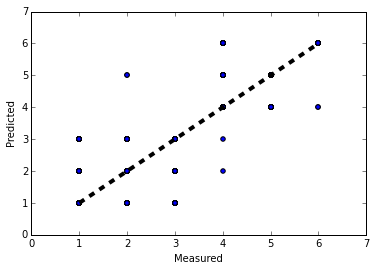

In [17]:
fig,ax = plt.subplots()
ax.scatter(y_train_np, predicted)
ax.plot([y_train_np.min(), y_train_np.max()], [y_train_np.min(), y_train_np.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')


# PCA

In [37]:
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler

trees = tree.DecisionTreeClassifier()
pca = decomposition.RandomizedPCA(n_components=500)
pipe = Pipeline(steps=[('pca', pca), ('tree', trees)])

X_train = StandardScaler().fit_transform(X_train_np) # Normalize data

pca.fit(X_train)

RandomizedPCA(copy=True, iterated_power=3, n_components=500,
       random_state=None, whiten=False)

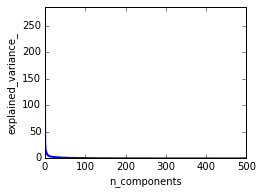

In [38]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [39]:
X = pca.transform(X_train_np)
trees.fit(X, y_train_np)

trees.score(pca.transform(X_test), y_test)

0.83915846623685109

In [40]:
scores = cross_validation.cross_val_score(
        estimator, X, y_train_np, cv=10)

print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))  

Accuracy: 0.80 (+/- 0.09)
